In [1]:
import numpy as np
from sympy import *
import networkx as nx
import matplotlib.pyplot as plt

Choose $N, K$ and $M$. We compute $S$ = nb of states (=cardinal of state-space) and `users`=iterator over set of users.

In [95]:
N = 2 # nb users
users = range(N)
K = 2
M = 2
S = (K+1)**2 * (M+1)**2

Create $\lambda$s and $\mu$s.

In [96]:
lambd = { i:Symbol('l%d'%i) for i in users }
mu = { i:Symbol('m%d'%i) for i in users }

We define the transition rate from a state `start` to a state `end`.

In [97]:
def transition_rate(start, end):

    # get init values of walls and newsfeeds
    w0, n0, w1, n1 = start[0], start[1], start[2], start[3]
    
    # movement
    z = list(np.array(end) - np.array(start))
    
    # case w0 +1
    if z == [1,0,0,0]:
        return (lambd[0] + mu[0]*n0/M) * (1-w0/K) * n1/M
    # case n1 +1
    elif z == [0,0,0,1]:
        return (lambd[0] + mu[0]*n0/M)  * w0/K * (1-n1/M)
    # case w0 +1 & n1 +1
    elif z == [1,0,0,1]:
        return (lambd[0] + mu[0]*n0/M) * (1-w0/K) * (1-n1/M)
    
    # case w0 -1
    elif z == [-1,0,0,0]:
        return mu[0] * (1-n0/M) * w0/K * (1-n1/M)
    # case n1 -1
    elif z == [0,0,0,-1]:
        return mu[0] * (1-n0/M) * (1-w0/K) * n1/M
    # case w0 -1 & n1 -1
    elif z == [-1,0,0,-1]:
        return mu[0] * (1-n0/M) * w0/K * n1/M
    
    # case w1 +1
    elif z == [0,0,1,0]:
        return mu[1] * n1/M * (1-w1/K) * n0/M
    # case n0 +1
    elif z == [0,1,0,0]:
        return mu[1] * n1/M * w1/K * (1-n0/M)
    # case w1 +1 & n0 +1
    elif z == [0,1,1,0]:
        return mu[1] * n1/M * (1-w1/K) * (1-n0/M)
        
    # case w1 -1
    elif z == [0,0,-1,0]:
        return (lambd[1] + mu[1]*(1-n1/M)) * w1/K * (1-n0/M)
    # case n0 -1
    elif z == [0,-1,0,0]:
        return (lambd[1] + mu[1]*(1-n1/M)) * (1-w1/K) * n0/M
    # case w1 -1
    elif z == [0,-1,-1,0]:
        return (lambd[1] + mu[1]*(1-n1/M)) * w1/K * n0/M
        
    # otherwise rate=0
    else:
        return 0

Create $Q$ (rate matrix). Make a copy as $Q_{theo}$ to keep original expressions.

In [98]:
Q = list()
for k1 in range(K+1):
    for k2 in range(M+1):
        for m2 in range(K+1):
            for m1 in range(M+1):
                Q.append(list())
                for k1_ in range(K+1):
                    for k2_ in range(M+1):
                        for m2_ in range(K+1):
                            for m1_ in range(M+1):
                                Q[-1].append(Symbol('q_%d%d%d%d^%d%d%d%d'%(k1, m1, k2, m2, k1_, m1_, k2_, m2_)))
Q = Matrix(Q)
Q_theo = Matrix(Q)

Fill $Q$ matrix with transition rates.

In [99]:
# iterate over Q matrix
for i in range(S):
    for j in range(S):
    
        # x=start, y=end
        x = [ int(xi) for xi in Q[i,j].name[2:6] ]
        y = [ int(yi) for yi in Q[i,j].name[-4:] ]

        # compute transition rate
        expr = transition_rate(x, y)
    
        # put new value in Q
        Q[i,j] = simplify(expr)
        
# now add diagonal values
for i in range(S):
    Q[i,i] = simplify(-sum(Q[i,:]))

In [100]:
for i,q in enumerate(Q):
    if q != 0:
        print(Q_theo[i], q)

q_0000^0000 -1.0*l0
q_0000^1001 1.0*l0
q_0100^0000 0.5*l1 + 0.5*m1
q_0100^0100 -1.0*l0 - 0.5*l1 - 0.5*m0 - 0.5*m1
q_0100^1101 1.0*l0 + 0.5*m0
q_0200^0100 l1 + m1
q_0200^0200 -1.0*l0 - 1.0*l1 - 1.0*m0 - 1.0*m1
q_0200^1201 1.0*l0 + 1.0*m0
q_0001^0000 0.5*m0
q_0001^0001 -1.0*l0 - 0.5*m0 - 0.5*m1
q_0001^0111 0.5*m1
q_0001^1001 0.5*l0
q_0001^1002 0.5*l0
q_0101^0100 0.25*m0
q_0101^0001 0.5*l1 + 0.25*m1
q_0101^0101 -1.0*l0 - 0.5*l1 - 0.75*m0 - 0.75*m1
q_0101^0111 0.25*m1
q_0101^0211 0.25*m1
q_0101^1101 0.5*l0 + 0.25*m0
q_0101^1102 0.5*l0 + 0.25*m0
q_0201^0101 l1 + m1/2
q_0201^0201 -1.0*l0 - 1.0*l1 - 1.0*m0 - 1.0*m1
q_0201^0211 0.5*m1
q_0201^1201 0.5*l0 + 0.5*m0
q_0201^1202 0.5*l0 + 0.5*m0
q_0002^0001 1.0*m0
q_0002^0002 -1.0*l0 - 1.0*m0 - 1.0*m1
q_0002^0112 1.0*m1
q_0002^1002 1.0*l0
q_0102^0101 0.5*m0
q_0102^0002 0.5*l1
q_0102^0102 -l0 - 0.5*l1 - 1.0*m0 - 1.0*m1
q_0102^0112 0.5*m1
q_0102^0212 0.5*m1
q_0102^1102 l0 + m0/2
q_0202^0102 1.0*l1
q_0202^0202 -1.0*l0 - 1.0*l1 - 1.0*m0 - 1.0*m1
q_0202^

Create $U$ (vector of stationary probability).

In [101]:
U = list()    
for k1 in range(K+1):
    for k2 in range(M+1):
        for m2 in range(K+1):
            for m1 in range(M+1):
                U.append(Symbol('Pi_%d%d%d%d'%(k1, m1, k2, m2)))
# U = Matrix([U])

In [102]:
U

[Pi_0000,
 Pi_0100,
 Pi_0200,
 Pi_0001,
 Pi_0101,
 Pi_0201,
 Pi_0002,
 Pi_0102,
 Pi_0202,
 Pi_0010,
 Pi_0110,
 Pi_0210,
 Pi_0011,
 Pi_0111,
 Pi_0211,
 Pi_0012,
 Pi_0112,
 Pi_0212,
 Pi_0020,
 Pi_0120,
 Pi_0220,
 Pi_0021,
 Pi_0121,
 Pi_0221,
 Pi_0022,
 Pi_0122,
 Pi_0222,
 Pi_1000,
 Pi_1100,
 Pi_1200,
 Pi_1001,
 Pi_1101,
 Pi_1201,
 Pi_1002,
 Pi_1102,
 Pi_1202,
 Pi_1010,
 Pi_1110,
 Pi_1210,
 Pi_1011,
 Pi_1111,
 Pi_1211,
 Pi_1012,
 Pi_1112,
 Pi_1212,
 Pi_1020,
 Pi_1120,
 Pi_1220,
 Pi_1021,
 Pi_1121,
 Pi_1221,
 Pi_1022,
 Pi_1122,
 Pi_1222,
 Pi_2000,
 Pi_2100,
 Pi_2200,
 Pi_2001,
 Pi_2101,
 Pi_2201,
 Pi_2002,
 Pi_2102,
 Pi_2202,
 Pi_2010,
 Pi_2110,
 Pi_2210,
 Pi_2011,
 Pi_2111,
 Pi_2211,
 Pi_2012,
 Pi_2112,
 Pi_2212,
 Pi_2020,
 Pi_2120,
 Pi_2220,
 Pi_2021,
 Pi_2121,
 Pi_2221,
 Pi_2022,
 Pi_2122,
 Pi_2222]

Define $Q_{aug}$ as $Q^T$ with row $(1, ...,1)$ added at the end, and $b=(0,...,0,1)^T$ so that we can resolve $Q_{aug}U^T=b$ (equivalent $UQ_{aug}=b$) instead of $\left\{UQ=0, Ue=1\right\}$. 

**Important :** $Q$ is overranked so we delete $Q_{aug}$'s first line and the first line of $b$.

In [103]:
Q_aug = Q.T[1:,:]
Q_aug = Q_aug.row_insert(S-1, Matrix([[1]*S]))
b = Matrix([0]*S + [1])
b = b[1:,:]

Solve $Q_{aug}U^T=b$.

In [104]:
sol = linsolve((Q_aug, b), U)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 3291, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-104-0a7eb577ae17>", line 1, in <module>
    sol = linsolve((Q_aug, b), U)
  File "D:\Anaconda\lib\site-packages\sympy\solvers\solveset.py", line 2124, in linsolve
    solution, params, free_syms = A.gauss_jordan_solve(b, freevar=True)
  File "D:\Anaconda\lib\site-packages\sympy\matrices\matrices.py", line 2703, in gauss_jordan_solve
    A, pivots = aug.rref(simplify=True)
  File "D:\Anaconda\lib\site-packages\sympy\matrices\matrices.py", line 893, in rref
    normalize_last=normalize_last)
  File "D:\Anaconda\lib\site-packages\sympy\matrices\matrices.py", line 548, in _eval_rref
    zero_above=True)
  File "D:\Anaconda\lib\site-packages\sympy\matrices\matrices.py", line 664, in _row_reduce
    get_col(piv_col)[piv_row:], iszerofunc, simpfunc)
  File "D:\Anaconda\lib\site-packages\s

KeyboardInterrupt: 

In [ ]:
for i,s in enumerate(list(sol)[0]):
    print(U[i], s)

## Graphe

In [110]:
G = nx.DiGraph()

In [111]:
for i in range(Q_theo.shape[0]):
    for j in range(Q_theo.shape[1]):
        if Q[i,j] != 0:
            u = Q_theo[i,j].name[2:6]
            v = Q_theo[i,j].name[-4:]
            weight = Q[i,j]
            G.add_edge(u, v, weight=weight)

In [112]:
nx.is_strongly_connected(G)

False

In [117]:
G.in_degree('2202')

4

In [115]:
for scc in nx.strongly_connected_components(G):
    print(scc)

{'2111', '2112', '0010', '1100', '2001', '1000', '0011', '0000', '1011', '0111', '0001', '1101', '1102', '2121', '1111', '0211', '0120', '2101', '1212', '2221', '1211', '2222', '0121', '0100', '0221', '2011', '2122', '1110', '0110', '1121', '2102', '1122', '2012', '2212', '0101', '1002', '1001', '1222', '1221', '2002', '1012', '2211', '1010', '1112', '1120'}
{'2202'}
{'1202'}
{'2201'}
{'1201'}
{'0200'}
{'0201'}
{'0212', '0012', '0222', '0112', '0002', '0122', '0102'}
{'0202'}
{'0210'}
{'2022', '0020', '1021', '1022', '2021', '0021', '1020'}
{'0220'}
{'0022'}
{'1200'}
{'1210'}
{'1220'}
{'2000'}
{'2100'}
{'2200'}
{'2010'}
{'2110'}
{'2210'}
{'2020'}
{'2120'}
{'2220'}


{'0000': Text(1.0, -3.849302210312544e-09, '0000'),
 '1001': Text(0.9238795042037964, 0.3826834559440613, '1001'),
 '0100': Text(0.7071067690849304, 0.7071067690849304, '0100'),
 '1101': Text(0.3826834261417389, 0.9238795042037964, '1101'),
 '0001': Text(-4.172473211383476e-08, 1.0, '0001'),
 '0111': Text(-0.3826833963394165, 0.9238795638084412, '0111'),
 '0101': Text(-0.7071067690849304, 0.7071067690849304, '0101'),
 '0010': Text(-0.9238795042037964, 0.38268348574638367, '0010'),
 '1011': Text(-1.0, -9.127207789560998e-08, '1011'),
 '0110': Text(-0.9238795042037964, -0.3826834261417389, '0110'),
 '1111': Text(-0.7071068286895752, -0.7071067094802856, '1111'),
 '0011': Text(-0.38268357515335083, -0.9238795042037964, '0011'),
 '1000': Text(1.3911536811406222e-08, -1.0, '1000'),
 '1100': Text(0.3826836049556732, -0.9238794445991516, '1100'),
 '1010': Text(0.7071067094802856, -0.70710688829422, '1010'),
 '1110': Text(0.9238795638084412, -0.3826834261417389, '1110')}

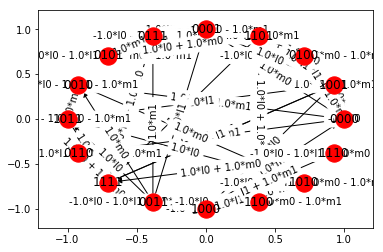

In [68]:
edge_labels = { e: G.edges[e]['weight'] for e in G.edges }
pos = nx.shell_layout(G)
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
nx.draw_networkx_labels(G, pos)

In [20]:
nx.is_strongly_connected(G)

False